In [70]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
# Styling
repo = "https://raw.githubusercontent.com/nicoguaro/matplotlib_styles/master"
style = repo + "/styles/neon.mplstyle"
plt.style.use(style)


import numpy as np
import numpy.random as nr
nr.RandomState(0)

import pandas as pd

import umap
import trimap
import pacmap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
def plotscatter(reduced, classtargets):
    plt.scatter(reduced[:,0], reduced[:,1], c=classtargets, cmap='Spectral', s=5)

def plotdigit(sample):
    sns.heatmap(sample.reshape(8,8), annot=True)

In [72]:
def algoPCA(dataset, ndim=2):
    from sklearn.decomposition import PCA
    embedding = PCA(n_components=ndim).fit_transform(dataset)
    return embedding

def algoTSNE(dataset, ndim=2):
    from sklearn.manifold import TSNE
    embedding = TSNE(n_components=ndim, learning_rate='auto', init='random').fit_transform(dataset)
    return embedding

def algoUMAP(dataset, ndim=2):
    embedding = umap.UMAP(n_components=ndim).fit_transform(dataset)
    return embedding

def algoTRIMAP(dataset, distance='euclidean', ndim=2):
    embedding = trimap.TRIMAP(n_dims=ndim, distance=distance).fit_transform(dataset)
    return embedding

In [73]:
def algovdata(algos, dataset, target, plotname="test.png"):

    assert len(datasets) == len(targets)
    plt.rcParams['figure.figsize']=(10,2.5)
    for aindx,algo in enumerate(algos):
        plt.subplot(1, len(algos), aindx+1)
        reduced = algo(dataset)
        plotscatter(reduced, target)
        plt.title(algo.__name__.replace("algo",""))
        plt.grid(False)
        # plt.legend()
    plt.savefig(plotname)
    

In [74]:
digits = datasets.load_digits()
print("Number of samples: ", len(digits.data))
print("Dimension of each sample:", digits.data[0].shape)
print(digits.data.shape)

Number of samples:  1797
Dimension of each sample: (64,)
(1797, 64)


In [75]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

penguins = penguins.dropna()
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

species_list = penguins.species_short.unique().tolist()
species = penguins.species_short.map(lambda x: species_list.index(x))

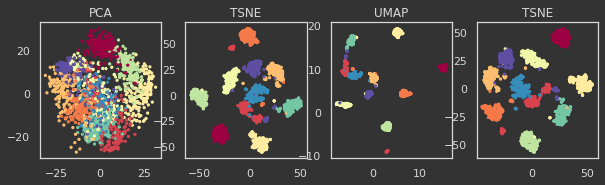

In [76]:
algos = [algoPCA, algoTSNE, algoUMAP, algoTSNE]
datasets = digits.data
targets = digits.target
algovdata(algos, datasets, targets,"digits.png")

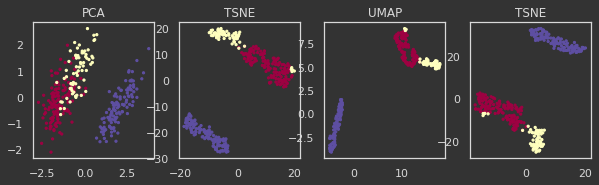

In [77]:
algos = [algoPCA, algoTSNE, algoUMAP, algoTSNE]
datasets = scaled_penguin_data
targets = species
algovdata(algos, datasets, targets,"penguins.png")